In [ ]:
# Create a moving bubble chart
fig = px.scatter(co2_mx_merged.sort_values(by='Year'),  
                 #x="gdpPercap", 
                 y="kg_CO2eq_tonne-km", 
                 size="pop", 
                 color="continent_from", 
                 hover_name="country_from", 
                 log_x=True,
                 log_y=True, 
                 size_max=60, 
                 animation_frame="Year", 
                 animation_group="country_from",
                 title="GDP per Capita vs kg CO2eq produced from food import")

# Update layout for better visualization
fig.update_layout(xaxis_title='GDP per Capita (log scale)',
                  yaxis_title='kg CO2eq (log scale)',
                  legend_title='Continent',
                  title_font_size=24)

# Show the figure
fig.show()


C:\Users\UX433F\AppData\Local\Temp\ipykernel_7072\2576865817.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


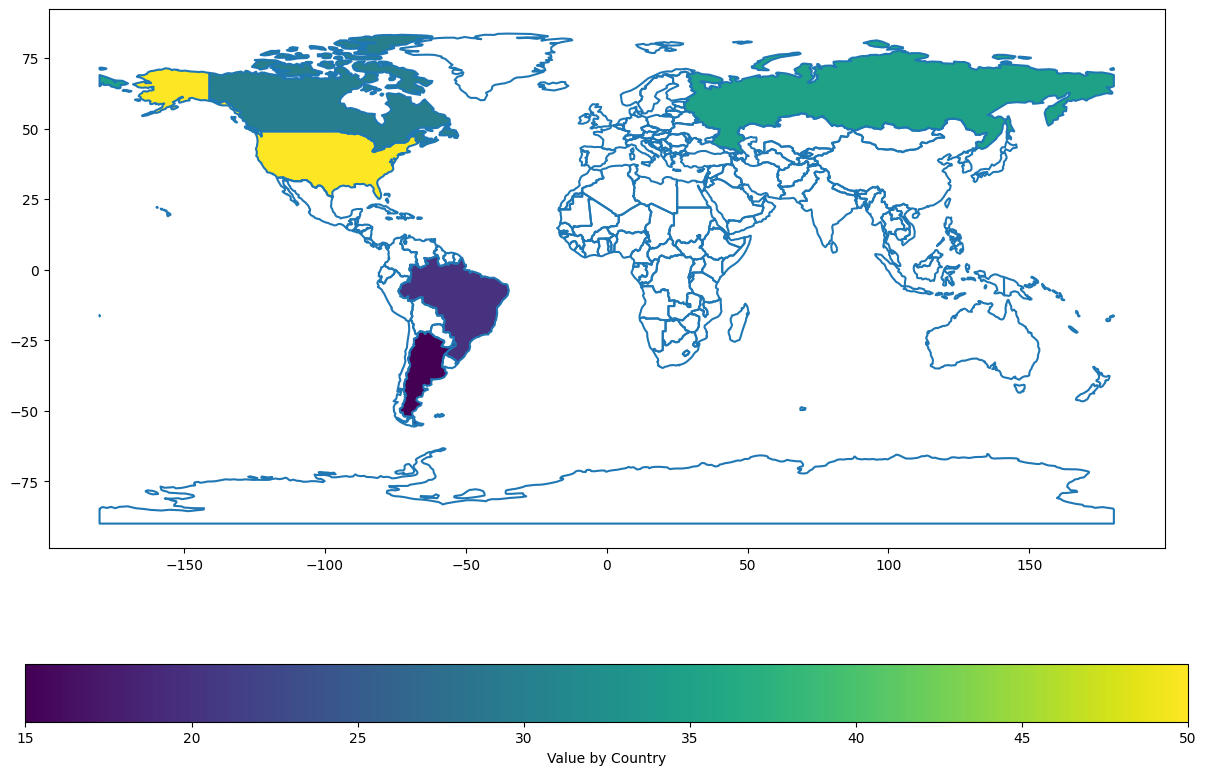

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create some example data
data = {'iso_a3': ['USA', 'CAN', 'BRA', 'ARG', 'RUS'],
        'value': [50, 30, 20, 15, 35]}
df = pd.DataFrame(data)

# Merge the data with the world GeoDataFrame
world = world.merge(df, how='left', left_on='iso_a3', right_on='iso_a3')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='value', ax=ax, legend=True,
           legend_kwds={'label': "Value by Country",
                        'orientation': "horizontal"})
plt.show()


In [2]:
import plotly.express as px
import pandas as pd

# Create some example data
data = {'country': ['USA', 'CAN', 'BRA', 'ARG', 'RUS'],
        'value': [50, 30, 20, 15, 35]}
df = pd.DataFrame(data)

# Plot the map
fig = px.choropleth(df, locations='country', locationmode='ISO-3',
                    color='value', hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title='Choropleth Map', title_x=0.5)
fig.show()


In [4]:
import plotly.express as px
import pandas as pd

# Example data
data = {
    'country': ['USA', 'USA', 'USA', 'CAN', 'CAN', 'CAN', 'BRA', 'BRA', 'BRA', 'ARG', 'ARG', 'ARG', 'RUS', 'RUS', 'RUS'],
    'value': [50, 55, 60, 30, 35, 40, 20, 25, 30, 15, 20, 25, 35, 40, 45],
    'year': [2000, 2005, 2010, 2000, 2005, 2010, 2000, 2005, 2010, 2000, 2005, 2010, 2000, 2005, 2010]
}

df = pd.DataFrame(data)

# Calculate global min and max
vmin = df['value'].min()
vmax = df['value'].max()

# Plot the interactive choropleth map
fig = px.choropleth(
    df, 
    locations='country', 
    locationmode='ISO-3', 
    color='value', 
    hover_name='country', 
    animation_frame='year',
    color_continuous_scale=px.colors.sequential.Plasma,
    range_color=(vmin, vmax)  # Set the range of the color scale
)

fig.update_layout(title='Interactive Choropleth Map over Years', title_x=0.5)
fig.show()
